<a href="https://colab.research.google.com/github/NicobaudinoQ/Aprendizaje-Profundo/blob/main/IAP_TP1_G7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TRABAJO PRÁCTICO I (Media Materia)**
Dado el dataset que busca predecir la [presencia o ausencia de Diabetes](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv). Se pide:


1. Realizar una pequeña inspeccion del dataset que busque entender de qué se trata el dataset y el problema a resolver. La idea es inspecionar no realizar un EDA completo, pueden valerse de herramientas que simplifiquen o realicen esta tarea.

2. Implementar una red neuronal simple con parametros por defaults (este será su baseline).

3. En una siguiente instancia realizar una busqueda de hiperparametros buscando mejorar el baseline.

4. Mostrar e Interpretar los resultados.

#### ACLARACIONES IMPORTANTES:

1. Pueden probar todo lo que gusten pero deben mostrar como máximo 3 implementaciones distintas.

2. La notebook a presentar debe ser legible incluyendo

    1. Introduccion

    2. Acompañar con comentarios que aporten a la interpretacion de los resultados.

    3. Una conclusion (breve pero no tan breve) con un resumen de lo trabajado y los resultados mas representativos de acuerdo a su interpretacion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import files


In [ ]:
# Cargamos el .CSV en nuestro drive y montamos Google Drive
try:
    drive.mount('/content/drive')
    ruta_al_archivo = '/content/drive/My Drive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
    df = pd.read_csv(ruta_al_archivo)
except FileNotFoundError:
    # Si el archivo no se encuentra en Google Drive, intenta cargarlo desde la computadora local
    uploaded_files = files.upload()
    df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
#df = pd.read_csv('https://raw.githubusercontent.com/NicobaudinoQ/Aprendizaje-Profundo/main/diabetes_012_health_indicators_BRFSS2015.csv'
#'https://raw.githubusercontent.com/NicobaudinoQ/Aprendizaje-Profundo/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
#'https://raw.githubusercontent.com/NicobaudinoQ/Aprendizaje-Profundo/main/diabetes_binary_health_indicators_BRFSS2015.csv'

### Exploración del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
df.shape

(70692, 22)

Analicemos nuestra variable target 'Diabetes_binary'

In [ ]:
df['Diabetes_binary'].unique()

array([0., 1.])

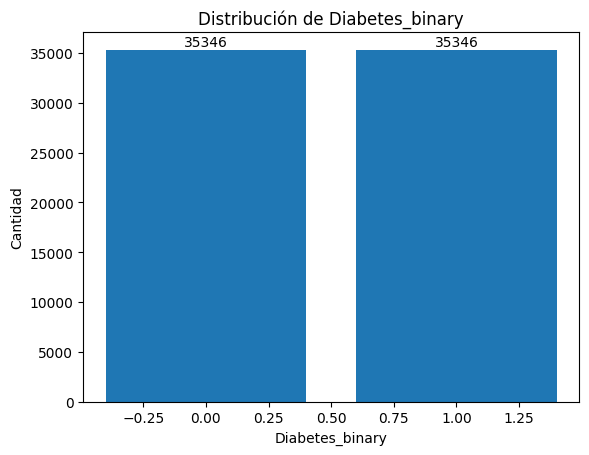

In [ ]:
# Contar la cantidad de 0 y 1 en la columna 'Diabetes_binary'
conteo = df['Diabetes_binary'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo.index, conteo.values)

plt.xlabel('Diabetes_binary')
plt.ylabel('Cantidad')
plt.title('Distribución de Diabetes_binary')

for i, v in enumerate(conteo.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


Las clases están balanceadas.